# Market Maker P&L Distributions and Skewness

This notebook explores the relationship between informed trading and market maker P&L distributions, comparing theoretical predictions with simulated outcomes.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils.mm_returns_generator import generate_mm_returns_with_informed, calculate_return_distribution_stats

## Part 1: Skewness vs Probability of Informed Trading

First, let's demonstrate how return skewness varies with the probability of informed trading (φ).

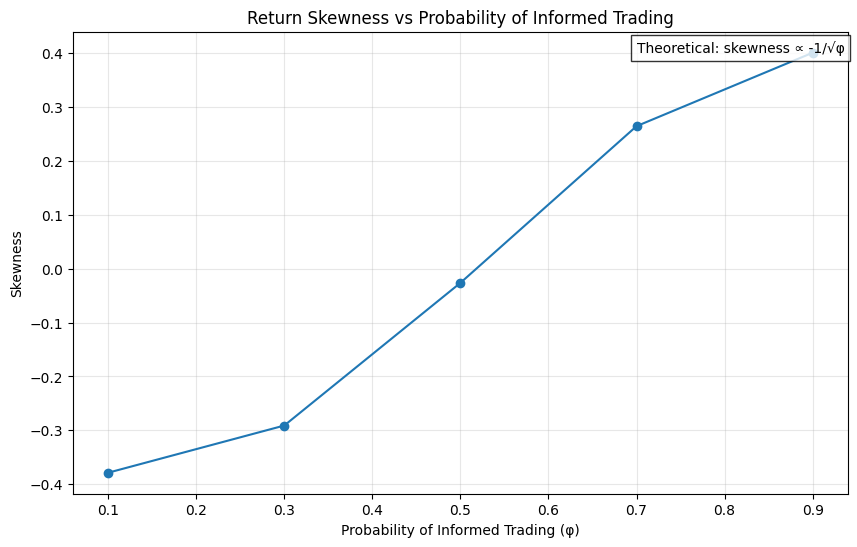

In [5]:
# Parameters
phi_values = np.arange(0.1, 1.1, 0.2)  # [0.1, 0.3, 0.5, 0.7, 0.9]
n_steps = 10000
base_vol = 0.01
J = 0.02

# Calculate skewness for each phi
skewness_values = []
for phi in phi_values:
    returns = generate_mm_returns_with_informed(n_steps=n_steps, phi=phi, J=J)
    stats = calculate_return_distribution_stats(returns)
    skewness_values.append(stats['skewness'])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(phi_values, skewness_values, marker='o')
plt.xlabel('Probability of Informed Trading (φ)')
plt.ylabel('Skewness')
plt.title('Return Skewness vs Probability of Informed Trading')
plt.grid(True, alpha=0.3)

# Add theoretical relationship
plt.text(0.7, max(skewness_values), 
         'Theoretical: skewness ∝ -1/√φ', 
         bbox=dict(facecolor='white', alpha=0.8))
plt.show()

## Part 2: Market Making P&L Distributions

Now let's simulate actual market making P&L distributions, comparing scenarios similar to the INTC vs PCLN example in the book.


Statistics for Low Vol Stock:
Mean: 0.0071
Std Dev: 0.0116
Skewness: 0.3593
Kurtosis: 0.3245

Statistics for High Vol Stock:
Mean: 0.0178
Std Dev: 0.0189
Skewness: 0.9093
Kurtosis: 0.1641


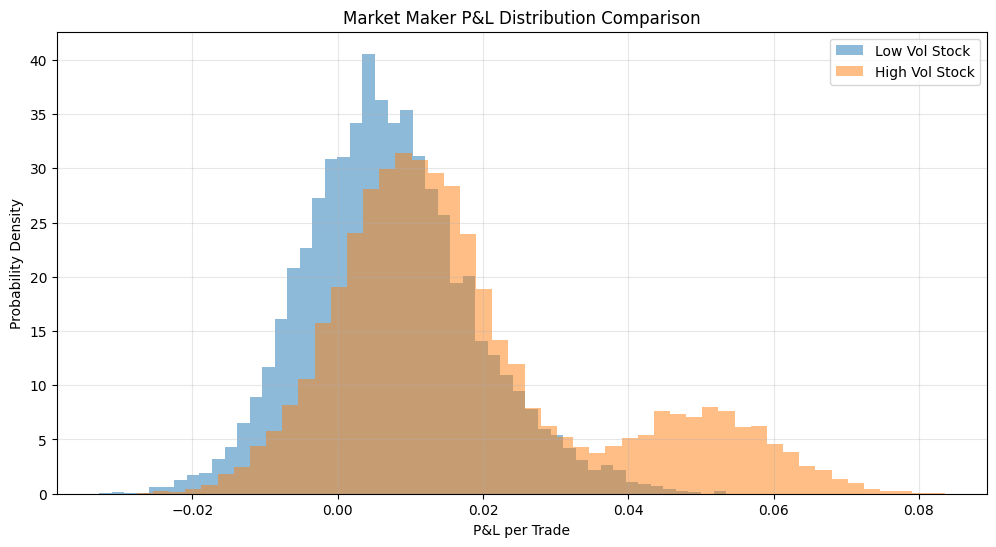

In [6]:
def simulate_mm_pnl(n_trades=10000, phi=0.1, J=0.02, spread=0.01):
    """
    Simulate market maker P&L using our return generator
    Returns P&L distribution incorporating:
    - Spread collection
    - Random price moves
    - Informed trading losses
    """
    returns = generate_mm_returns_with_informed(n_trades, phi=phi, J=J)
    
    # Add spread collection (positive for market maker)
    pnl = spread/2 - returns
    
    return pnl

# Define scenarios for comparison
scenarios = {
    'Low Vol Stock': {'phi': 0.1, 'J': 0.02, 'spread': 0.01},
    'High Vol Stock': {'phi': 0.2, 'J': 0.04, 'spread': 0.02}
}

# Create comparison plot
plt.figure(figsize=(12, 6))
for name, params in scenarios.items():
    pnl = simulate_mm_pnl(**params)
    stats = calculate_return_distribution_stats(pnl)
    
    plt.hist(pnl, bins=50, density=True, alpha=0.5, label=name)
    
    print(f"\nStatistics for {name}:")
    print(f"Mean: {stats['mean']:.4f}")
    print(f"Std Dev: {stats['std']:.4f}")
    print(f"Skewness: {stats['skewness']:.4f}")
    print(f"Kurtosis: {stats['kurtosis']:.4f}")

plt.title('Market Maker P&L Distribution Comparison')
plt.xlabel('P&L per Trade')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Key Observations

1. Skewness Pattern:
   - More negative skewness with lower φ
   - Matches theoretical prediction of -1/√φ relationship

2. P&L Distributions:
   - Both show characteristic negative skewness
   - High volatility stock shows:
     * Wider spread of outcomes
     * Larger potential losses
     * Higher compensation (wider spread)

3. Market Making Characteristics:
   - Small, frequent gains from spread
   - Larger, infrequent losses from informed trading
   - Risk increases with volatility and informed trading

These simulated distributions show patterns similar to the empirical INTC/PCLN examples in the book, suggesting our model captures key aspects of real market making dynamics.